In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
path = r'/Users/polusa/Library/Mobile Documents/com~apple~CloudDocs/my_DA_2024/CareerFoundry_Data_Analytics_Bootcamp/4-Python_Fundamentals_for_DA/04-2024_Instacart_Basket_Analysis/02-Data'

raw_data_folder = r'01-Raw_Data'
prepared_data_folder = r'02-Prepared_Data'

In [3]:
customers_df = pd.read_csv(os.path.join(path, raw_data_folder, 'customers.csv'), delimiter=',')

In [6]:
customers_df.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [7]:
customers_df.shape

(206209, 10)

### 4) Wrangle the data so that it follows consistent logic; for example, rename columns with illogical names and drop columns that don’t add anything to your analysis.  
Let's remove the column `fam_status` since it is not needed in our analysis

In [8]:
customers_df.drop(columns=('fam_status'), inplace = True)
customers_df.head(3)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,99568


Let's rename the columns to make it more understandable and to match the cases

In [9]:
new_col_names = {
    'First Name': 'first_name',
    'Surnam': 'last_name',
    'Gender': 'gender',
    'STATE': 'state',
    'Age': 'age',
    'date_joined': 'joining_date',
    'n_dependants': 'num_of_dependants'
}

customers_df.rename(columns=new_col_names, inplace=True)

In [10]:
customers_df.head(3)

,user_id,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,99568


##### Descriptive Statistics

In [11]:
customers_df.describe()

,user_id,age,num_of_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


Since we don't want the `user_id` column be included in the statistics (it is a qualitative data) we'll change its type to string

In [12]:
customers_df['user_id'] = customers_df['user_id'].astype('str')

In [13]:
customers_df['user_id'].dtype

dtype('O')

In [14]:
customers_df.describe()

,age,num_of_dependants,income
count,206209.000000,206209.000000,206209.000000
mean,49.501646,1.499823,94632.852548
std,18.480962,1.118433,42473.786988
min,18.000000,0.000000,25903.000000
25%,33.000000,0.000000,59874.000000
50%,49.000000,1.000000,93547.000000
75%,66.000000,3.000000,124244.000000
max,81.000000,3.000000,593901.000000


The variables `age` and `num_of_dependants` seem to have logically sound and consistent values.  
The variable `income` it is worht investigating a bit further as the max value, is a bit of an outlier. It might be completely ok that someone has an income of about 600k $, but defintely if that is an isolated case, like the mean suggests, it may skew the analysis that include the `income` as a variable.

/Users/polusa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='Count'>

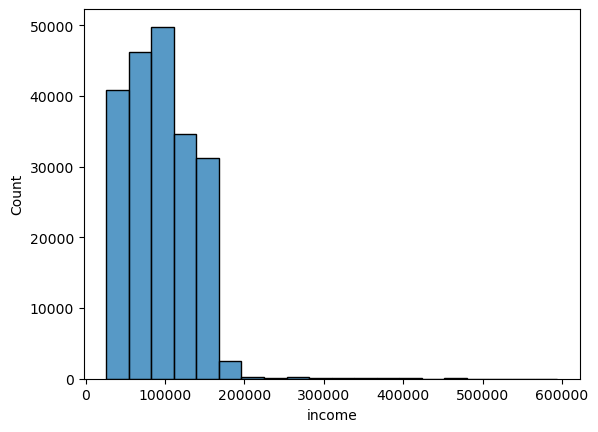

In [15]:
sns.histplot(data=customers_df, x = 'income', bins = 20 )

<Axes: xlabel='income', ylabel='income'>

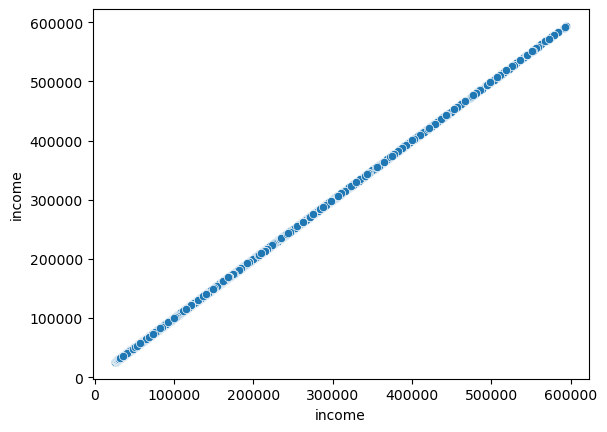

In [16]:
sns.scatterplot(data = customers_df, x='income', y='income')

After a quick analysis utilizing a histogram and a scatterplot, we can say that the `income` variable is right-skewed but the scatterplot reveals that is not an isolated case as there are other users that have high income.  
It is worth nothing the median in this case is a better measure of central tendency.

In [15]:
# median (50th percentile)
np.percentile(customers_df['income'], 50)
# np.median(customers_df['income'])

93547.0

### 5) Complete the fundamental data quality and consistency checks you’ve learned throughout this Achievement; for example, check for and address missing values and duplicates, and convert any mixed-type data.

1. Let's check for mixed datatype in any column

In [16]:
mixed_types = customers_df.apply(lambda x: len(set(map(type, x))) > 1)
mixed_types

user_id              False
first_name            True
last_name            False
gender               False
state                False
age                  False
joining_date         False
num_of_dependants    False
income               False
dtype: bool

The column `first_name` seems to have some incosistent data types.  
We need to fix that by changing all values to strings.

In [17]:
customers_df['first_name'] = customers_df['first_name'].astype('str')

In [18]:
customers_df['first_name'].dtype

dtype('O')

Let's rerun the check to make sure everything "type wise" is in order:

In [19]:
mixed_types = customers_df.apply(lambda x: len(set(map(type, x))) > 1)
mixed_types

user_id              False
first_name           False
last_name            False
gender               False
state                False
age                  False
joining_date         False
num_of_dependants    False
income               False
dtype: bool

2. Let's deal with missing values, if any.

In [20]:
# True is like 1, so we can sum "vertically" and see if any null value is present
customers_df.isnull().sum(axis=0)

user_id              0
first_name           0
last_name            0
gender               0
state                0
age                  0
joining_date         0
num_of_dependants    0
income               0
dtype: int64

There are no missing or null values in the dataset.  

3 - Duplicates

In [21]:
customers_df.head()

,user_id,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,40374


Before proceeding with finding if there is any duplicated record, I will save in lower case all the strings value in a temporary copy of the dataframe. This will ensure that no duplaicates (if any) are missed since python is case-sensitive when searching for duplicates.

In [22]:
customers_df.shape

(206209, 9)

In [23]:
customers_df_copy = customers_df.copy(deep=True)

In [24]:
customers_df_copy['first_name'] = customers_df_copy['first_name'].str.lower()
customers_df_copy['last_name'] = customers_df_copy['last_name'].str.lower() 
customers_df_copy['gender'] = customers_df_copy['gender'].str.lower()
customers_df_copy['state'] = customers_df_copy['state'].str.lower()

In [25]:
customers_df_copy.head()

,user_id,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income
0,26711,deborah,esquivel,female,missouri,48,1/1/2017,3,165665
1,33890,patricia,hart,female,new mexico,36,1/1/2017,0,59285
2,65803,kenneth,farley,male,idaho,35,1/1/2017,2,99568
3,125935,michelle,hicks,female,iowa,40,1/1/2017,0,42049
4,130797,ann,gilmore,female,maryland,26,1/1/2017,1,40374


In [26]:
customers_df_copy.duplicated().sum()

0

Let's make sure also there is no duplicates in the `user_id` column alone as a further confirmation:

In [27]:
customers_df_copy['user_id'].duplicated().sum()

0

Great! No duplicates in the customers dataset. 

### 6) Combine your customer data with the rest of your prepared Instacart data. (Hint: Make sure the key columns are the same data type!)

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, prepared_data_folder, 'ords_prods_merge-4.8.pkl'))

In [4]:
ords_prods_merge.shape

(32404859, 20)

In [30]:
ords_prods_merge.columns.to_list()

['order_id',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_last_order',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_label',
 'busiest_days',
 'busiest_period_of_day',
 'order_max',
 'loyalty_flag',
 'spending_flag',
 'order_frequency_flag']

In [31]:
customers_df.columns.to_list()

['user_id',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'joining_date',
 'num_of_dependants',
 'income']

The `user_id` column will be used as key to link the two dataframes

In [32]:
customers_df['user_id'].dtype

dtype('O')

In [33]:
ords_prods_merge['user_id'].dtype

dtype('int64')

I will convert the `ords_prods_merge['user_id']` column to string

In [34]:
ords_prods_merge['user_id'] = ords_prods_merge['user_id'].astype('str')

In [35]:
ords_prods_merge['user_id'].dtype

dtype('O')

In [36]:
customers_df.shape

(206209, 9)

Before deciding the type of join let's check if the customer's `user_id` are all present in the orders `user_id` columns.

In [37]:
# all() return True if all values are True
ords_prods_merge['user_id'].isin(customers_df['user_id']).all()

True

Let's merge the dataset:

In [38]:
ords_prods_custs = pd.merge(ords_prods_merge, customers_df, on='user_id', how='inner', indicator=True)

In [ ]:
ords_prods_custs.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,joining_date,num_of_dependants,income,_merge
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,both
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,...,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,both
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,...,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,both
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,...,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,both
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,...,non-frequent-customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,98119,both


In [ ]:
ords_prods_custs.shape

(32404859, 29)

In [ ]:
# check if there was a match for every row
ords_prods_custs['_merge'].value_counts(dropna=False)

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [ ]:
# drop _merge column
ords_prods_custs.drop(columns=['_merge'], inplace=True)

In [ ]:
pd.to_pickle(ords_prods_custs, os.path.join(path, prepared_data_folder, 'ords_prods_custs_4.9.pkl'))